In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
df = pd.read_csv('taxi.csv')
print(df.head())

                                    Trip ID  \
0  0287f53fedcde6b0af9aab9e32cbd2cadb337eaa   
1  1f0034299b914fd7b45002568576a353c83acb2f   
2  01a0b77b722a0b91f45cb4fc90b3e64f76fd0681   
3  14aff2071ac81c6450a8f8b0e1534497da900197   
4  16d3a633e2f380cee4a7fa4677db163b6e91255d   

                                             Taxi ID    Trip Start Timestamp  \
0  e54db25f18193a08f1f5754515e8c338480e04fb938ed3...  03/01/2024 12:00:00 AM   
1  4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...  03/01/2024 12:00:00 AM   
2  4f1e94982e6851725add382f7981d64006ae7c38f3664f...  03/01/2024 12:00:00 AM   
3  de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...  03/01/2024 12:00:00 AM   
4  d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...  03/01/2024 12:00:00 AM   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0  03/01/2024 12:00:00 AM          15.0        0.09                  NaN   
1  03/01/2024 12:15:00 AM         900.0        3.00                  NaN   
2  03/01

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
df = df[['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras','Pickup Community Area', 'Dropoff Community Area','Trip Start Timestamp', 'Company', 'Payment Type']].dropna()

In [55]:
df['Trip Seconds'] = df['Trip Seconds'].astype(float)
df['Trip Miles'] = df['Trip Miles'].astype(float)
df['Fare'] = df['Fare'].astype(float)
df['Tips'] = df['Tips'].astype(float)
df['Tolls'] = df['Tolls'].astype(float)
df['Extras'] = df['Extras'].astype(float)
df['Pickup Community Area'] = df['Pickup Community Area'].astype(int)
df['Dropoff Community Area'] = df['Dropoff Community Area'].astype(int)

In [56]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], errors='coerce')
df['hour'] = df['Trip Start Timestamp'].dt.hour
df['weekday'] = df['Trip Start Timestamp'].dt.weekday
df['month'] = df['Trip Start Timestamp'].dt.month
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

/tmp/ipython-input-56-2345103934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], errors='coerce')


In [57]:
df['trip_minutes'] = df['Trip Seconds'] / 60
df['avg_speed_mph'] = df['Trip Miles'] / (df['trip_minutes'] / 60 + 1e-6)
df['fare_per_mile'] = df['Fare'] / df['Trip Miles']
df['fare_per_minute'] = df['Fare'] / df['trip_minutes']

df = df[(df['Fare'] > 2) & (df['Fare'] < 100)]
df = df[(df['Trip Miles'] > 0.1) & (df['Trip Miles'] < 50)]
df = df[df['Trip Seconds'] > 30]
df = df[(df['avg_speed_mph'] < 100)]

df = pd.get_dummies(df, columns=['Company', 'Payment Type'], drop_first=True)

feature_cols = [
    'Trip Seconds', 'Trip Miles', 'Pickup Community Area', 'Dropoff Community Area',
    'Tips', 'Tolls', 'Extras', 'hour', 'weekday', 'month', 'is_rush_hour',
    'trip_minutes', 'avg_speed_mph', 'fare_per_mile', 'fare_per_minute'
] + [col for col in df.columns if col.startswith('Company_') or col.startswith('Payment Type_')]

In [58]:
X = df[feature_cols]
y = df['Fare']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 16.07
Root Mean Squared Error: 4.01
R² Score: 0.9288


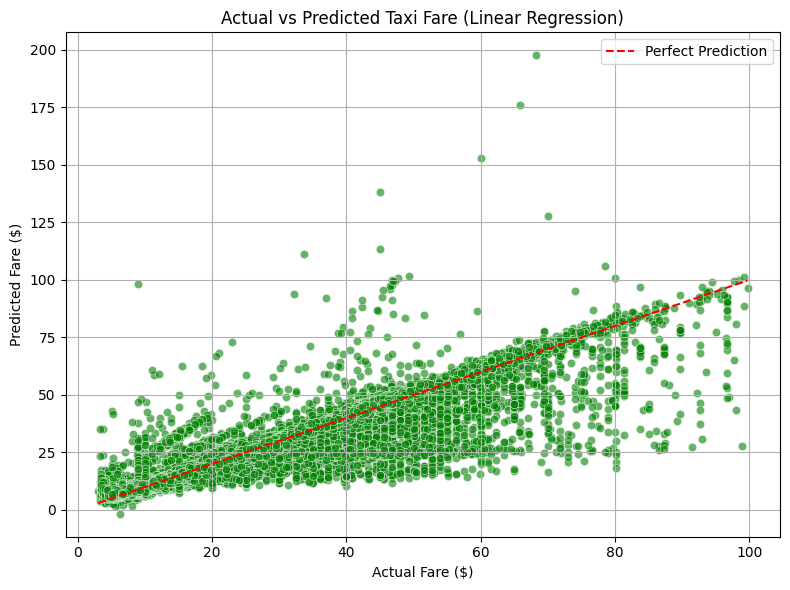

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='green')  # Scatter: Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line

plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Taxi Fare (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
